In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras import layers
import cv2, os
from tqdm import tqdm
from random import shuffle
import shutil
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
main_path = os.path.join('gdrive', 'MyDrive', 'Colab Notebooks', 'jetbot_detekcja')
dataset_path = os.path.join(main_path, 'dataset')
print(os.listdir(dataset_path))
train_dir= os.path.join(dataset_path, "training")
test_dir= os.path.join(dataset_path, "testing")

['testing', 'training']


In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split= 0.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'training')
val_generator = train_datagen.flow_from_directory(train_dir, target_size=(50,50), color_mode='grayscale', batch_size=20, class_mode='binary', subset= 'validation')

Found 161 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(50,50,1), padding='same'))
# model.add(LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.activations.relu(alpha=0.1))
model.add(Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

In [5]:
# Model Compilation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit_generator(train_generator, epochs=20, validation_data=val_generator, validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.4658

9/9 [==============================] - 41s 3s/step - loss: 0.6934 - accuracy: 0.4658 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
9/9 [==============================] - 0s 31ms/step - loss: 0.7029 - accuracy: 0.4224
Epoch 3/20
9/9 [==============================] - 0s 30ms/step - loss: 0.6990 - accuracy: 0.5031
Epoch 4/20
9/9 [==============================] - 0s 32ms/step - loss: 0.6966 - accuracy: 0.5342
Epoch 5/20
9/9 [==============================] - 0s 31ms/step - loss: 0.6919 - accuracy: 0.5031
Epoch 6/20
9/9 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5155
Epoch 7/20
9/9 [==============================] - 0s 30ms/step - loss: 0.6969 - accuracy: 0.5031
Epoch 8/20
9/9 [==============================] - 0s 31ms/step - loss: 0.6929 - accuracy: 0.4969
Epoch 9/20
9/9 [==============================] - 0s 33ms/step - loss: 0.6877 - accuracy: 0.5217
Epoch 10/20
9/9 [==============================] - 0s 30ms/step - loss: 0.6933 - accuracy: 0.5280

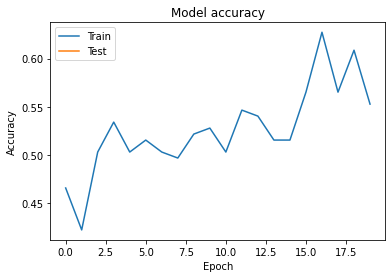

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

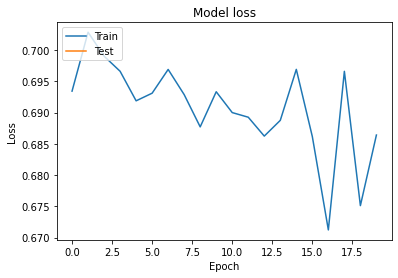

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def Single_Image_Prediction(file):
#     image = load_img(file, color_mode='rgb', target_size=(128, 128))
    image = cv2.imread(file)
    plt.imshow(image)
    plt.show()
    image= cv2.resize(image, (50,50))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_arr = img_to_array(image)
    img_arr = img_arr/255.
    np_image = np.expand_dims(img_arr, axis=0)
    return np_image

In [10]:
model_path = os.path.join(main_path, "best_model.ckpt")
model.save_weights(model_path)

In [11]:
model_loaded = tf.keras.models.Sequential()
model_loaded.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(50,50,1), padding='same'))
# model.add(LeakyReLU(alpha=0.1))
model_loaded.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model_loaded.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model_loaded.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model_loaded.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model_loaded.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model_loaded.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
# model.add(tf.keras.activations.relu(alpha=0.1))
model_loaded.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))
model_loaded.add(tf.keras.layers.Flatten())
model_loaded.add(tf.keras.layers.Dropout(0.5))
model_loaded.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# model.add(tf.keras.activations.relu(alpha=0.1))
model_loaded.add(Dropout(0.5))
model_loaded.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model_loaded.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model_loaded.summary()
# print(model_loaded)


In [12]:
model_loaded.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
print(model_loaded)
model_loaded.load_weights(model_path)
print(model_loaded)

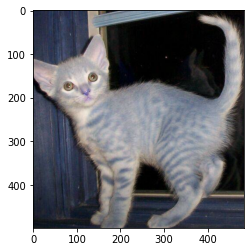

1/1 [==============================] - 0s 107ms/step
[[0.47835243]]
cat


In [14]:
print(model_loaded)
image = Single_Image_Prediction(os.path.join(test_dir,'6.jpg'))
pred_value = model_loaded.predict(image)
print(pred_value)
if pred_value < 0.5:
    print('cat')
else:
    print('dog')